# Predicting the Price of the S&P500 using Machine Learning 

In [18]:
# We will use Yahoo Finance to get our SP500 data

import yfinance as yf

In [27]:
# This is the ticker/sym for the S&P500

sp500 = yf.Ticker("^GSPC")

sp500 = sp500.history(period="max")

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-18 00:00:00-04:00,5031.520020,5056.660156,5001.890137,5011.120117,3619760000,0.0,0.0
2024-04-19 00:00:00-04:00,5005.439941,5019.020020,4953.560059,4967.229980,3878750000,0.0,0.0
2024-04-22 00:00:00-04:00,4987.330078,5038.839844,4969.399902,5010.600098,3820250000,0.0,0.0


<Axes: xlabel='Date'>

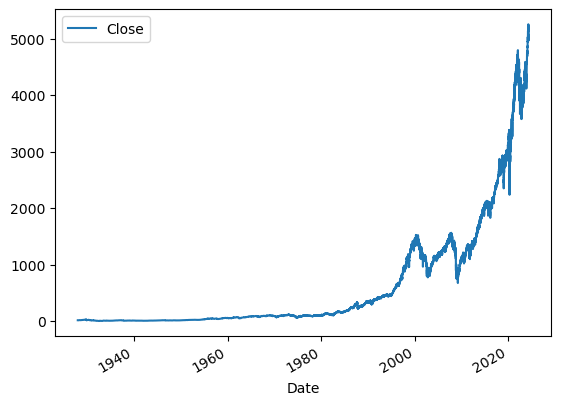

In [28]:
# Plot the (closing) price of SP500 for all the dates we have for visualisation

sp500.plot.line(y="Close", use_index=True)

In [29]:
# Clean up the data - Remove unnecesary columns 

del sp500["Dividends"]
del sp500["Stock Splits"]

## What to Predict?

We need to be carfeul when chossing what exactly our ML model is actually going to be attempting to predict. 

It would seem to make sense for it be trying to predict the exact price of the S&P500 on a given day. But actually if we try this, even with quite an accurate model we would be often wrong on the direction of movement day to day. This means for the hypothetical purpose of actually buying S&P500 stock on a given day, this is not the best thing to predict. 

We want to simply predict if the price will go up or down the next day, not the actual exact price value.

In [30]:
# Create a new boolean 'target' column which tells us if the price will go up for a given day

sp500["Tomorrow"] = sp500["Close"].shift(-1)

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-18 00:00:00-04:00,5031.520020,5056.660156,5001.890137,5011.120117,3619760000,4967.229980,0
2024-04-19 00:00:00-04:00,5005.439941,5019.020020,4953.560059,4967.229980,3878750000,5010.600098,1
2024-04-22 00:00:00-04:00,4987.330078,5038.839844,4969.399902,5010.600098,3820250000,5070.549805,1


In [31]:
# Normally the more data the better but if we go too far back in time we may be dealing with a stock market under very different conditions to the modern day, 
# making that data less useful for our predictions. So exclude data before 1990

sp500 = sp500.loc["1990-01-01":].copy()

## Which type of ML model to use?
We will choose a Random Forest Model for our purposes here. This model is relatively popular choice for classification problems as it is not too computationally intensive and it also is less likely than some other models to overfit to the training data set. This is because it uses many different decision trees, each with different splitting criteria.

n_estimators is the number of decision trees in the random forest.

min_smaple_split is the minimum amount of rows required for the decision tree to split the data by some criteria.

We will then split our data into a training set and a testing set. As this is time series data, we must be careful to respect the time order when it comes to this splitting. Otherwise we will affectively be allowing the model to make predictions using some data from the future, which is obviousy not going to be possible in the resal world.



In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialise the model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Split data into training and testing sets
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# Use as many columns as predictors as possible
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fit the model to our dataset
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [33]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])

preds = pd.Series(preds, index=test.index)

# Here are our predictions for whether or not the prce will go up for the following days...
preds

Date
2023-11-30 00:00:00-05:00    0
2023-12-01 00:00:00-05:00    0
2023-12-04 00:00:00-05:00    1
2023-12-05 00:00:00-05:00    0
2023-12-06 00:00:00-05:00    1
                            ..
2024-04-18 00:00:00-04:00    0
2024-04-19 00:00:00-04:00    0
2024-04-22 00:00:00-04:00    0
2024-04-23 00:00:00-04:00    0
2024-04-24 00:00:00-04:00    0
Length: 100, dtype: int32

In [54]:
# Let's check the precision of these predictions
precision_score(test["Target"], preds)

0.8

## Backtesting - a most robust way to test our model
So far we have checked how our model did for one trainging set and one testing set. This is not as many tests as we would like. We are going to use a process known as backtesting in order to be more sure of the performance of our model.

This consists of dividing the data into chunks, for example in our case we could use years. We would then use the first 10 years as the training set and the 11th year as the test. Then use the first 11 years as the training set and the 12th year as the test. And so on and so forth. This means we would end up with roughly 20 tests of the precision of our model, which is a bit more robust. 

In [35]:
# First wrap everything we've done so far into a predict function
def predict(train, test, predictors, model):
    
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    
    return combined

In [36]:
# Now define a backtesting function which using an initial chunk of 2500 rows (~10 years) and chunks of size 250 after that (~ 1 trading year)
def backtest(data, model, predictors, start=2500, step=250):
    
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [55]:
# Run the backtest function 
predictions = backtest(sp500, model, predictors)

# Quick sanity check to make sure we are predicting a roughly equal amount of yes's and no's to the quesiton of whether or not the price will go up on a given day. If not something would be wrong
predictions["Predictions"].value_counts()

predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.543846
0    0.456154
Name: count, dtype: float64

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

## Additional Predictors

One way we can improve the precision of our model is to give it more columns to use a predictors of the target. 

We can calculate a few of these and supply them to the model. Intuitively some things which may be helpful for prediction are the ratios of the close price to a rolling average over some time period, and the trends. We can calculate these as seen below.

In [42]:
# Add additional predictors to try and improve accuracy

# Use a variety of time horizons/periods
horizons = [2, 5, 60, 250, 1000]

new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]
    
    

In [43]:
sp500 = sp500.dropna()

In [44]:
#Change the model slightly

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

## Making the model more picky

Another way we can improve the predictive power of our model is by making it more picky.

We can adjust the model to predict a probability for the price going up tomorrow, rather than rounding this to a boolean. We then manually round only probability values of greater than 60% to a 1. In this way we will be less likely to have false positives. 

This suits our use case well; when deciding whether or not to buy S&P500 on a given day, what is important to us is that the price will in fact go up when the model says so. Even if that means missing out on some days when the model was too conservative and gives a false negative. 

In [46]:
# Only produce a 1 when the model judges the probability to be >60%
def predict(train, test, predictors, model):
    
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    
    return combined

In [50]:
# Rerun the backtesting with the addition of these new predictors

new_predictions = backtest(sp500, model, new_predictors)

# Check how many days the model says the market will go up and how many it will go down on

new_predictions["Predictions"].value_counts()

Predictions
0.0    4269
1.0     874
Name: count, dtype: int64

In [51]:
precision_score(new_predictions["Target"], new_predictions["Predictions"])

0.5743707093821511

## Possible Extensions

 - Some markets trade overnight, and the data from these could be added to the model in order to improve prodiction.
 - Sentiment analysis could be carried out on text sources like news articles which mention the S&P500.
 - The resolution could be increased. This would involve looking at hour by hour or minute by minute data.
 - Tweaking the parameters of the models, such as n_estimators and min_samples_split, may change the quality of the results.

[0.5758620689655173, 0.5719745222929936, 0.585499316005472, 0.5652173913043478, 0.5667244367417678, 0.5907473309608541, 0.5825049701789264]


Text(0, 0.5, 'Precision')

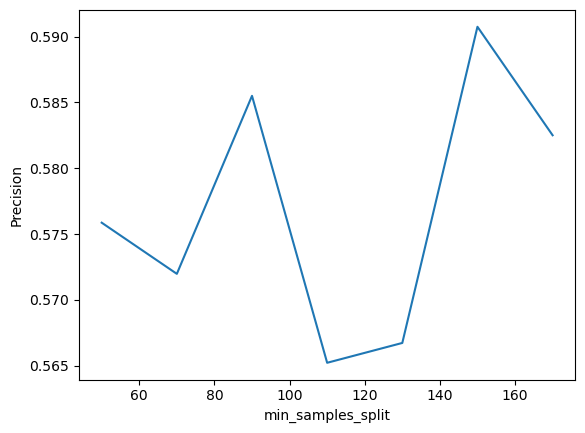

In [80]:
import matplotlib as plt

# Examine how min_samples_split affects precision:
splits = [50, 70, 90, 110, 130, 150, 170]

result_precisions = []

for split in splits:
    
    current_model = RandomForestClassifier(n_estimators=100, min_samples_split=split, random_state=1)
    current_prediction_set = backtest(sp500, current_model, new_predictors)
    current_precision = precision_score(current_prediction_set["Target"], current_prediction_set["Predictions"])
    result_precisions.append(current_precision)
    

# Plot 
print(result_precisions)
plt.pyplot.plot(splits, result_precisions)
plt.pyplot.xlabel("min_samples_split")
plt.pyplot.ylabel("Precision")


[0.5829145728643216, 0.5876288659793815, 0.5862068965517241, 0.5875912408759124, 0.5875912408759124, 0.5674676524953789]


Text(0, 0.5, 'Precision')

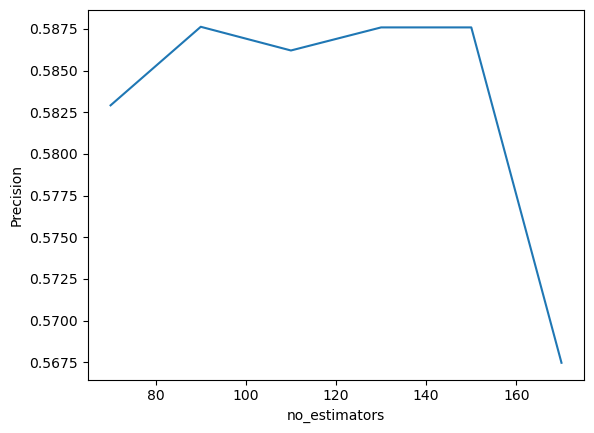

In [84]:
# Examine how the number of estimators (trees in the forest) affects precision:

no_trees = [70, 90, 110, 130, 150, 170]
est_result_precisions = []

for num in no_trees:
    
    current_model = RandomForestClassifier(n_estimators=num, min_samples_split=150, random_state=1)
    current_prediction_set = backtest(sp500, current_model, new_predictors)
    current_precision = precision_score(current_prediction_set["Target"], current_prediction_set["Predictions"])
    est_result_precisions.append(current_precision)
    

# Plot
print(est_result_precisions)
plt.pyplot.plot(no_trees, est_result_precisions)
plt.pyplot.xlabel("no_estimators")
plt.pyplot.ylabel("Precision")



We see here that we have peak precision at no_estimators=90 and min_samples_split=150

In [52]:
# Tune the model to these optimal hyperparameter values

tuned_model = RandomForestClassifier(n_estimators=90, min_samples_split=150, random_state=1)

tuned_predictions = backtest(sp500, tuned_model, new_predictors)

precision_score(tuned_predictions["Target"], tuned_predictions["Predictions"])

0.5866209262435678